In [225]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import xlrd
import openpyxl
import warnings

warnings.filterwarnings("ignore")

---
FASE 1
----
---

In [226]:
# Carica il dataset
filepath = '/content/sample_data/Emissioni 10.000 ab.xls'
df = pd.read_excel(filepath)

df1 = df.copy()

df1.head()

,"Fattori di emissione medi da traffico per settore, combustibile e tipo legislativo in Lombardia nel 2014 - public review (Fonte: INEMAR ARPA LOMBARDIA)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Settore,Combustibile,Tipo legislativo,Periodo,Consumo specifico,SO2,NOx,COV,CH4,CO,CO2,N2O,NH3,PM2.5,PM10,PTS
2,NaN,NaN,NaN,NaN,g/km,mg/km,mg/km,mg/km,mg/km,mg/km,g/km,mg/km,mg/km,mg/km,mg/km,mg/km
3,Automobili,benzina verde,Euro 0,< 01/01/93,61.632435,1.204133,2084.048393,1620.773665,122.076129,12362.960114,190.028009,8.179762,1.999326,15.565311,27.0227,40.058423
4,Automobili,benzina verde,Euro 1 - 91/441/EEC,da 01/01/1993 a 31/12/1996,59.253481,1.140755,711.703829,588.338866,25.705812,5830.90428,182.673617,15.460622,102.897094,15.733231,27.190619,40.226342


In [227]:
#estrae header e dati
header = df1.iloc[1]
data_df = df1[3:63]
data_df.columns = header

data_df.reset_index(drop=True, inplace = True)
data_df.head()

1,Settore,Combustibile,Tipo legislativo,Periodo,Consumo specifico,SO2,NOx,COV,CH4,CO,CO2,N2O,NH3,PM2.5,PM10,PTS
0,Automobili,benzina verde,Euro 0,< 01/01/93,61.632435,1.204133,2084.048393,1620.773665,122.076129,12362.960114,190.028009,8.179762,1.999326,15.565311,27.0227,40.058423
1,Automobili,benzina verde,Euro 1 - 91/441/EEC,da 01/01/1993 a 31/12/1996,59.253481,1.140755,711.703829,588.338866,25.705812,5830.90428,182.673617,15.460622,102.897094,15.733231,27.190619,40.226342
2,Automobili,benzina verde,Euro 2 - 94/12/EC,da 01/01/1997 a 31/12/2000,56.54658,1.125293,358.630231,157.147263,35.396946,2068.050436,174.355865,7.945214,148.842319,15.732021,27.189409,40.225132
3,Automobili,benzina verde,Euro 3 - 98/69/EC Stage 2000,da 01/01/2001 a 31/12/2005,57.539716,1.147106,79.716127,15.488732,24.151833,1131.241819,177.412878,2.582156,23.055528,14.404072,25.86146,38.897183
4,Automobili,benzina verde,Euro 4 - 98/69/EC Stage 2005,da 01/01/2006 a 31/12/2010,59.429358,1.187123,50.254159,10.406638,17.541094,362.63487,182.827675,1.945418,23.549106,14.400368,25.857756,38.893479


In [228]:
data_df.describe()

1,Settore,Combustibile,Tipo legislativo,Periodo,Consumo specifico,SO2,NOx,COV,CH4,CO,CO2,N2O,NH3,PM2.5,PM10,PTS
count,60,60,60,59,60.000000,60.0,60.000000,60.000000,60.000000,60.0,60.000000,60.0,60.000000,60.000000,60.0000,60.000000
unique,5,4,26,22,60.000000,44.0,60.000000,60.000000,60.000000,59.0,60.000000,59.0,60.000000,60.000000,60.0000,60.000000
top,Automobili,benzina verde,Euro 3 - 98/69/EC Stage 2000,da 01/01/2001 a 31/12/2005,61.632435,0.0,2084.048393,1620.773665,122.076129,1000.0,190.028009,0.0,1.999326,15.565311,27.0227,40.058423
freq,21,22,6,6,1.000000,17.0,1.000000,1.000000,1.000000,2.0,1.000000,2.0,1.000000,1.000000,1.0000,1.000000


In [229]:
data_df.dropna(inplace=True)
data_df.isna().sum()

1
Settore              0
Combustibile         0
Tipo legislativo     0
Periodo              0
Consumo specifico    0
SO2                  0
NOx                  0
COV                  0
CH4                  0
CO                   0
CO2                  0
N2O                  0
NH3                  0
PM2.5                0
PM10                 0
PTS                  0
dtype: int64

In [230]:
data_df.dtypes

1
Settore              object
Combustibile         object
Tipo legislativo     object
Periodo              object
Consumo specifico    object
SO2                  object
NOx                  object
COV                  object
CH4                  object
CO                   object
CO2                  object
N2O                  object
NH3                  object
PM2.5                object
PM10                 object
PTS                  object
dtype: object

In [231]:
parametri = ['Consumo specifico', 'SO2', 'NOx', 'COV', 'CH4', 'CO', 'CO2', 'N2O', 'NH3', 'PM2.5', 'PM10', 'PTS']

# Converti le colonne numeriche da tipo "object" a tipo numerico
data_df[parametri] = data_df[parametri].apply(pd.to_numeric, errors='coerce')

# Rimuovi le righe con valori mancanti (NaN)
data_df.dropna(inplace=True)

# Verifica il tipo di dati dopo la conversione
data_df.dtypes

1
Settore               object
Combustibile          object
Tipo legislativo      object
Periodo               object
Consumo specifico    float64
SO2                  float64
NOx                  float64
COV                  float64
CH4                  float64
CO                   float64
CO2                  float64
N2O                  float64
NH3                  float64
PM2.5                float64
PM10                 float64
PTS                  float64
dtype: object

In [232]:
data_df.shape

(59, 16)

In [233]:
data_df.head()

1,Settore,Combustibile,Tipo legislativo,Periodo,Consumo specifico,SO2,NOx,COV,CH4,CO,CO2,N2O,NH3,PM2.5,PM10,PTS
0,Automobili,benzina verde,Euro 0,< 01/01/93,61.632435,1.204133,2084.048393,1620.773665,122.076129,12362.960114,190.028009,8.179762,1.999326,15.565311,27.022700,40.058423
1,Automobili,benzina verde,Euro 1 - 91/441/EEC,da 01/01/1993 a 31/12/1996,59.253481,1.140755,711.703829,588.338866,25.705812,5830.904280,182.673617,15.460622,102.897094,15.733231,27.190619,40.226342
2,Automobili,benzina verde,Euro 2 - 94/12/EC,da 01/01/1997 a 31/12/2000,56.546580,1.125293,358.630231,157.147263,35.396946,2068.050436,174.355865,7.945214,148.842319,15.732021,27.189409,40.225132
3,Automobili,benzina verde,Euro 3 - 98/69/EC Stage 2000,da 01/01/2001 a 31/12/2005,57.539716,1.147106,79.716127,15.488732,24.151833,1131.241819,177.412878,2.582156,23.055528,14.404072,25.861460,38.897183
4,Automobili,benzina verde,Euro 4 - 98/69/EC Stage 2005,da 01/01/2006 a 31/12/2010,59.429358,1.187123,50.254159,10.406638,17.541094,362.634870,182.827675,1.945418,23.549106,14.400368,25.857756,38.893479


In [234]:
data_df.describe()

1,Consumo specifico,SO2,NOx,COV,CH4,CO,CO2,N2O,NH3,PM2.5,PM10,PTS
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,99.461188,1.171560,1516.237525,561.229143,152.343810,2980.690300,293.736618,8.472356,18.396493,60.881546,80.395267,101.082685
std,100.335806,1.199654,2776.098837,1304.380565,611.421986,4770.887005,279.528161,10.940182,36.309331,78.868290,86.434470,97.097480
min,20.000000,0.000000,19.393293,0.041421,0.517091,0.402021,63.596840,0.000000,0.960116,11.332775,17.063931,22.615017
25%,56.933987,0.000000,97.213575,20.305304,11.518623,459.598859,168.294097,1.619086,1.318899,15.731717,27.189106,40.219736
50%,61.422102,1.116467,442.365268,61.775082,24.090000,1151.767616,182.673617,5.072397,3.915500,21.957718,38.930245,55.485585
75%,90.541693,1.565810,1261.834423,481.574674,58.921366,3480.601025,276.816263,8.443480,14.051390,66.306159,107.454895,129.660708
max,515.000001,4.244201,15000.000036,8181.000003,4500.000009,23201.747257,1421.740102,48.557862,160.148587,379.759751,426.945340,479.874084


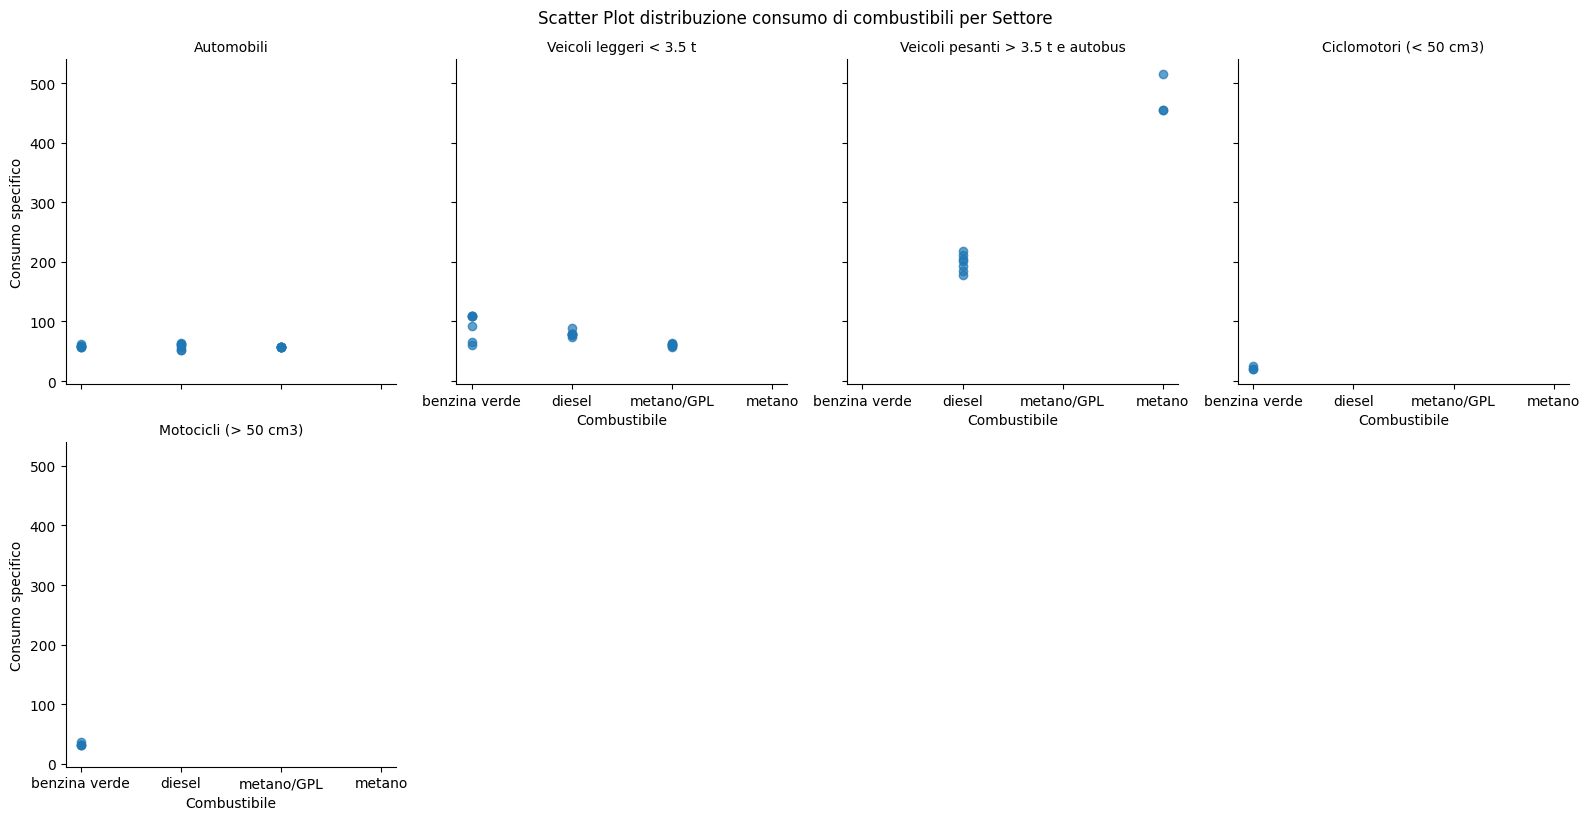

In [235]:
# Impostare la griglia di facce
g = sns.FacetGrid(data_df, col="Settore", col_wrap=4, height=4)

# Mappare uno scatter plot su ogni faccia
g.map(plt.scatter, "Combustibile", "Consumo specifico", alpha=0.7)

# Aggiungere il titolo alla griglia
g.set_titles(col_template="{col_name}")
g.fig.suptitle("Scatter Plot distribuzione consumo di combustibili per Settore", y=1.02)

# Mostrare i grafici
plt.show()

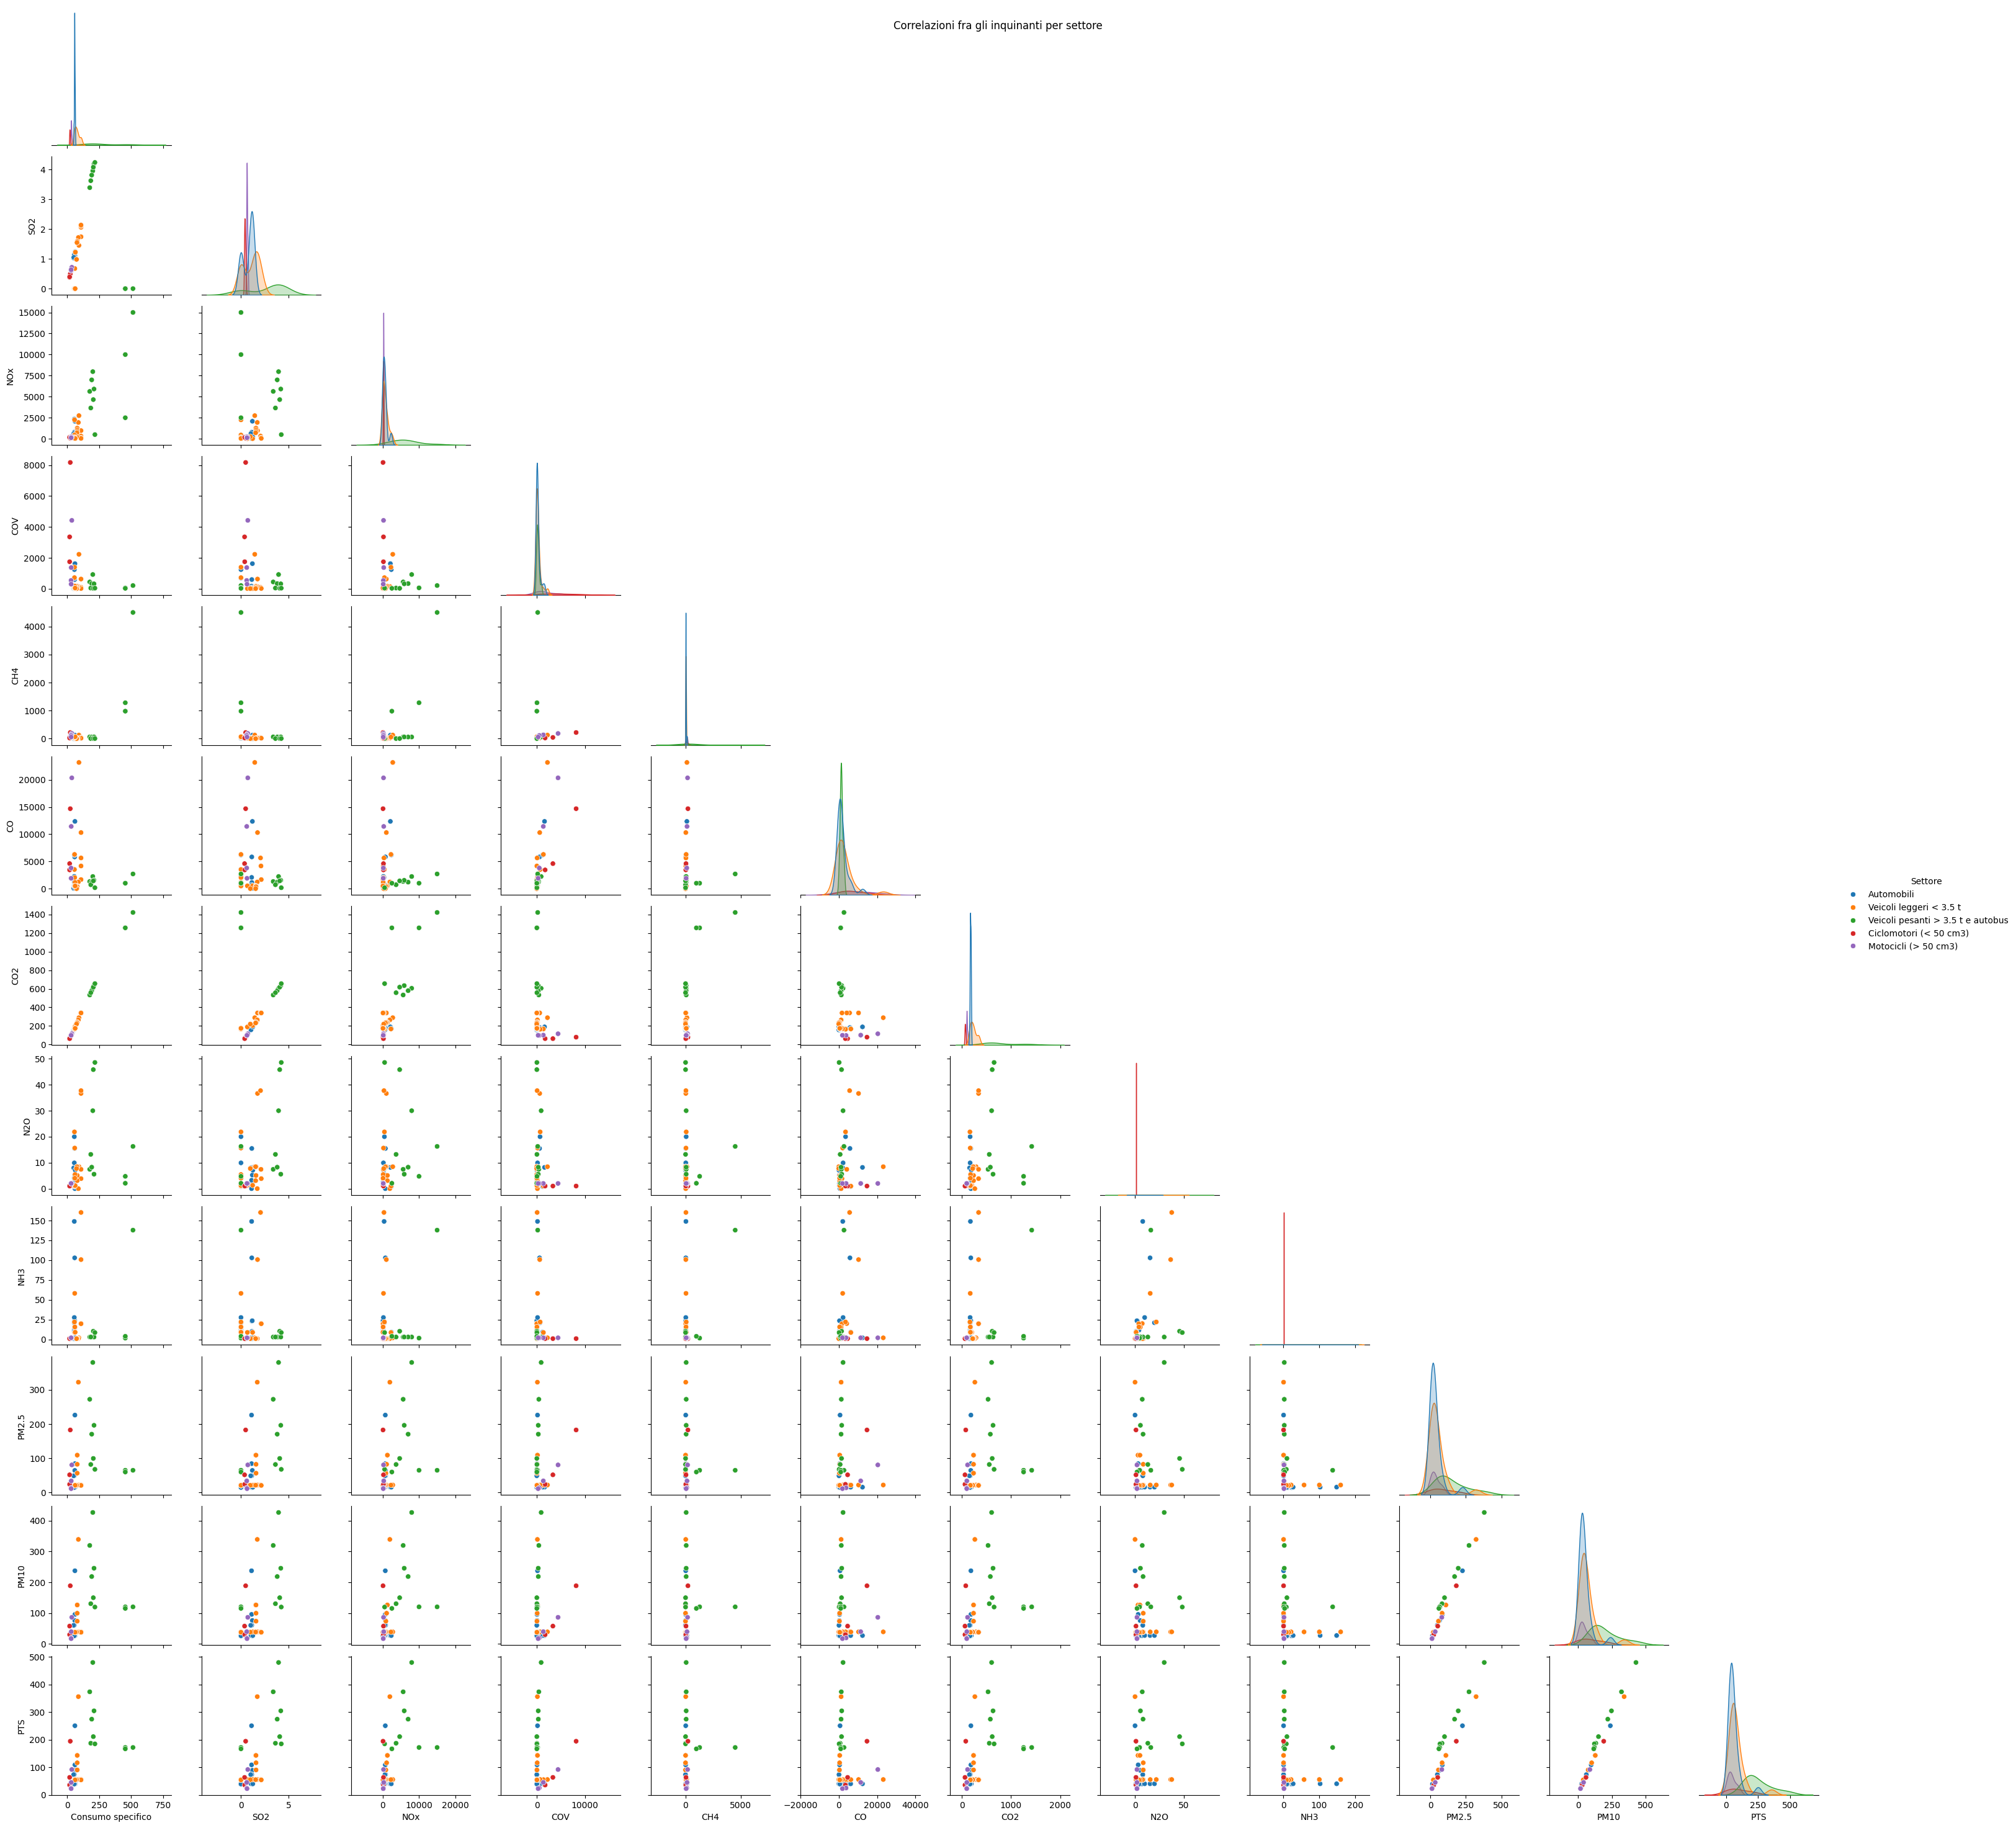

In [236]:
sns.pairplot(data_df, hue="Settore", height=2.5, corner=True, aspect=1)
plt.suptitle("Correlazioni fra gli inquinanti per settore")
plt.show()

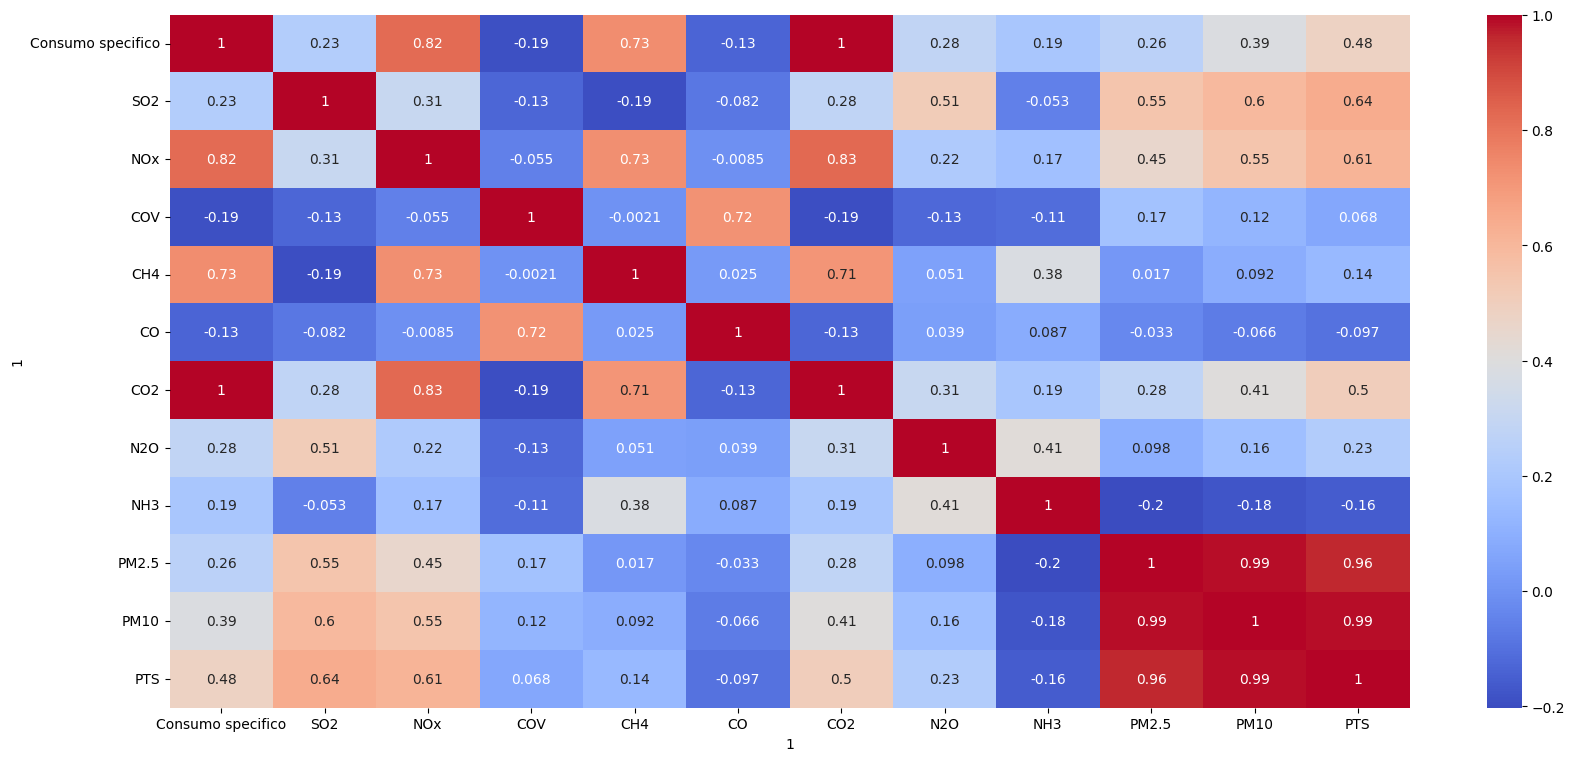

In [237]:
correlation_matrix = data_df.corr()
plt.figure(figsize=(20, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.show()

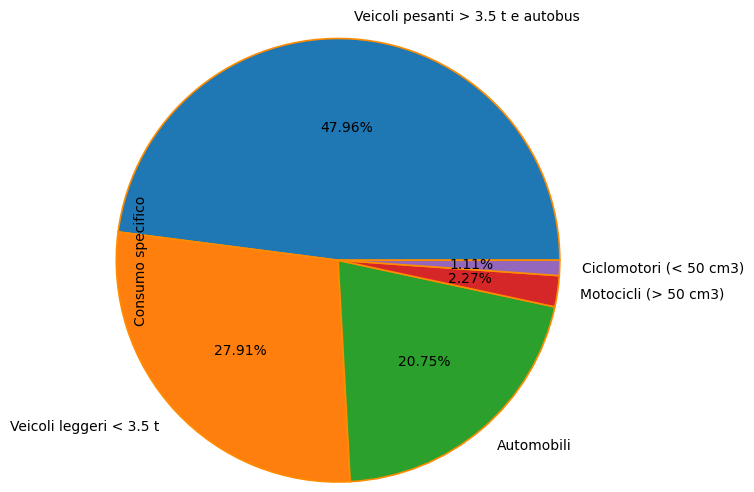

<Figure size 400x400 with 0 Axes>

In [238]:
df2 = data_df.copy()

df2.groupby(by = df2["Settore"])["Consumo specifico"].sum().sort_values(
ascending=False)[:5].plot(kind="pie",
                                  autopct="%1.2f%%",radius = 1.5,
                                  wedgeprops={'linewidth':1.2,
                                             'edgecolor':'darkorange'})
plt.figure(figsize=(4, 4))
plt.show()

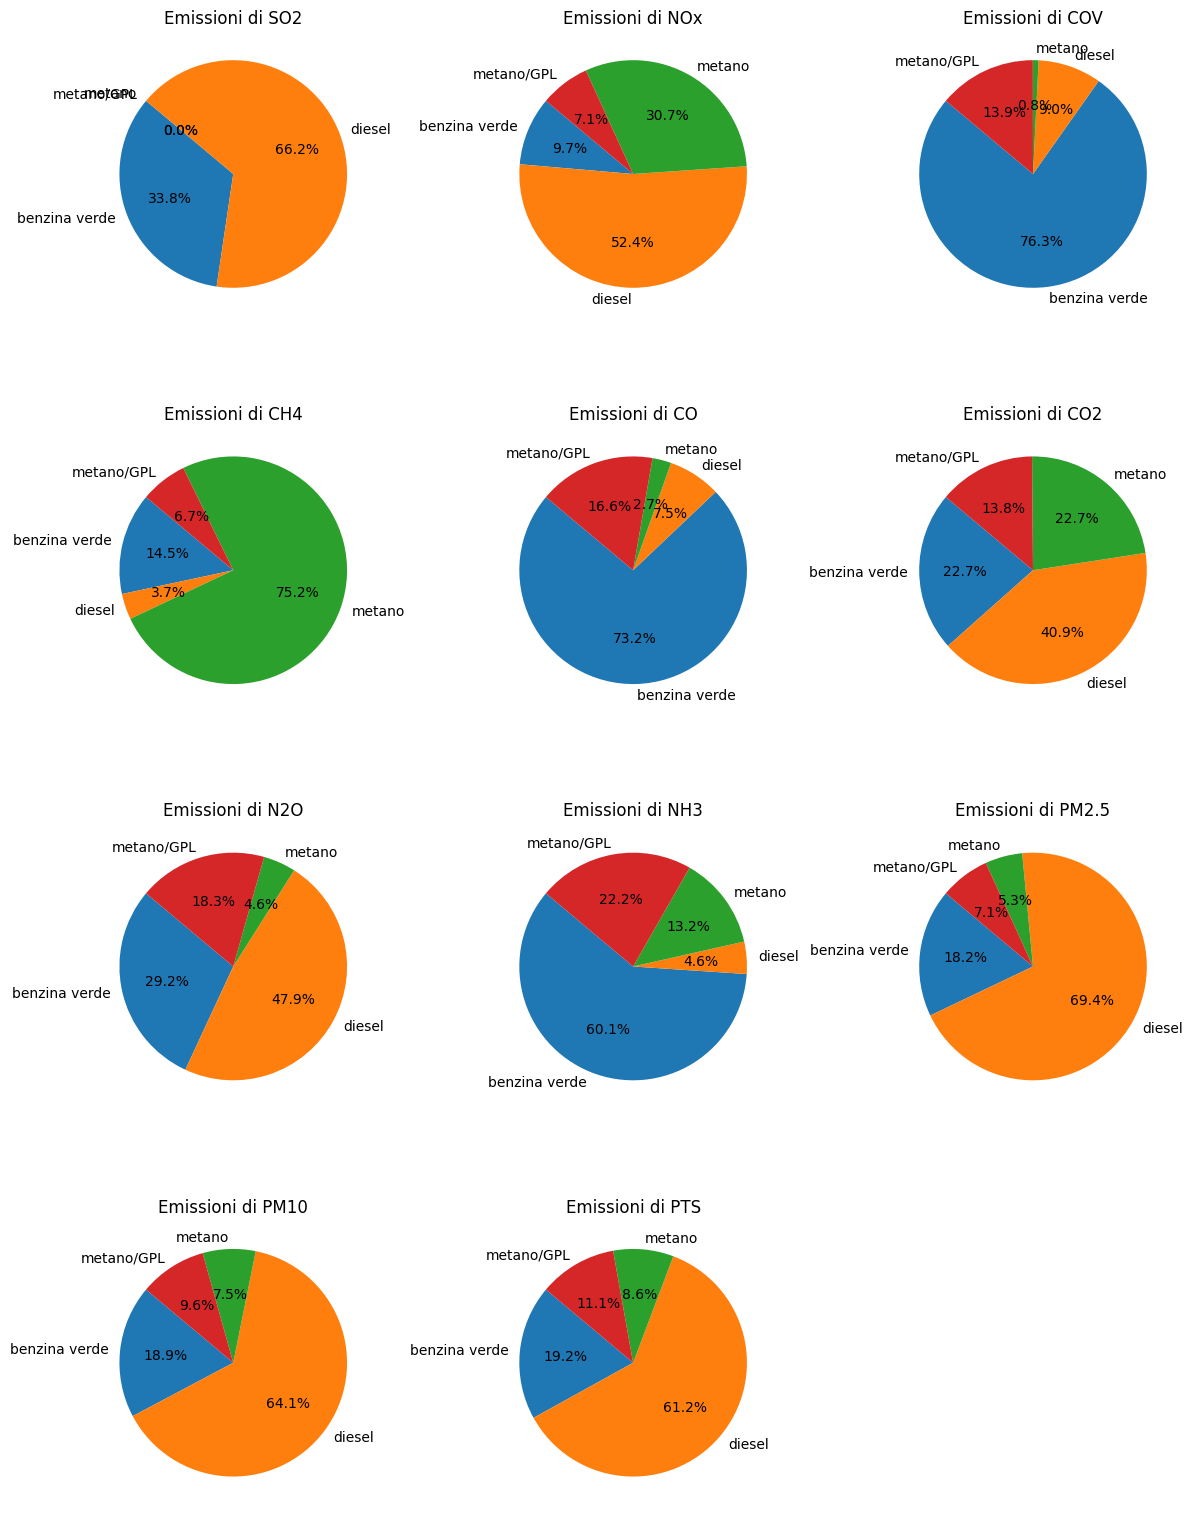

In [239]:
# Elenca tutti gli inquinanti
inquinanti = ['SO2', 'NOx', 'COV', 'CH4', 'CO', 'CO2', 'N2O', 'NH3', 'PM2.5', 'PM10', 'PTS']

# Calcola il numero di righe e colonne per i subplot
n = len(inquinanti)
ncols = 3
nrows = n // ncols if n % ncols == 0 else n // ncols + 1

fig, axs = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*4))

# Crea il grafico a torta per ogni inquinante
for ax, inquinante in zip(np.ravel(axs), inquinanti):
    # Calcola la somma totale dell'inquinante per ogni tipo di combustibile
    somme_combustibili = df2.groupby('Combustibile')[inquinante].sum()

    ax.pie(somme_combustibili, labels=somme_combustibili.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Emissioni di {inquinante}')

# Rimuovi gli assi vuoti
for ax in np.ravel(axs)[len(inquinanti):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

---
FASE 2
----
---

In [240]:
data_prev = data_df[['Settore', 'Combustibile', 'Consumo specifico']]
data_prev.to_csv

<bound method NDFrame.to_csv of 1                             Settore   Combustibile  Consumo specifico
0                          Automobili  benzina verde          61.632435
1                          Automobili  benzina verde          59.253481
2                          Automobili  benzina verde          56.546580
3                          Automobili  benzina verde          57.539716
4                          Automobili  benzina verde          59.429358
5                          Automobili  benzina verde          57.870009
6                          Automobili  benzina verde          58.580742
7                          Automobili         diesel          61.422102
8                          Automobili         diesel          61.663577
9                          Automobili         diesel          60.526213
10                         Automobili         diesel          56.907392
11                         Automobili         diesel          51.454528
12                         Autom

In [241]:
# Codifica le variabili categoriche
label_encoder = LabelEncoder()
data_prev['Settore'] = label_encoder.fit_transform(data_prev['Settore'])
data_prev['Combustibile'] = label_encoder.fit_transform(data_prev['Combustibile'])

# Dividi il dataset
X = data_prev[['Combustibile', 'Consumo specifico']]
y = data_prev['Settore']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [242]:
# Crea e addestra il modello KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

# Effettua le previsioni
y_pred_knn = knn_classifier.predict(X_test)

# Valuta le prestazioni
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy KNeighborsClassifier: {accuracy_knn}')

Accuracy KNeighborsClassifier: 0.9166666666666666


In [243]:
# Crea e addestra il modello SVM
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train, y_train)

# Effettua le previsioni
y_pred_svm = svm_classifier.predict(X_test)

# Valuta le prestazioni
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy SVM: {accuracy_svm}')

Accuracy SVM: 0.9166666666666666


In [244]:
from sklearn.metrics import classification_report

# Valutazione KNeighborsClassifier
print("KNeighborsClassifier:")
print(classification_report(y_test, y_pred_knn))

# Valutazione SVM
print("SVM:")
print(classification_report(y_test, y_pred_svm))

KNeighborsClassifier:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         3

    accuracy                           0.92        12
   macro avg       0.93      0.96      0.94        12
weighted avg       0.94      0.92      0.92        12

SVM:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         3

    accuracy                           0.92        12
   macro avg       0.93      0.96      0.94        12
weighted avg       0.94      0.92      0.92       

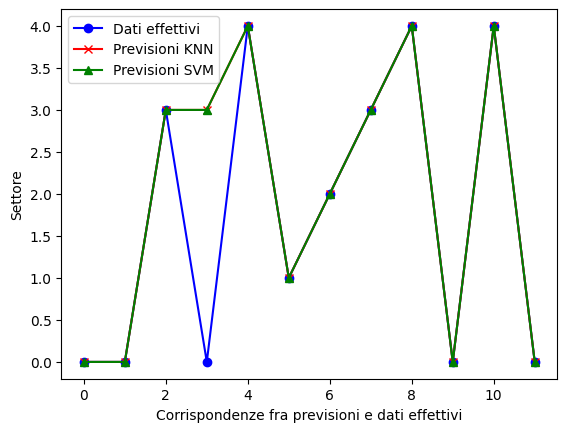

In [245]:
# Plot dei dati effettivi
plt.plot(y_test.values, label='Dati effettivi', color='blue', marker='o')

# Plot delle previsioni KNeighborsClassifier
plt.plot(y_pred_knn, label='Previsioni KNN', color='red', marker='x')

# Plot delle previsioni SVM
plt.plot(y_pred_svm, label='Previsioni SVM', color='green', marker='^')

# Aggiungi etichette agli assi
plt.xlabel('Corrispondenze fra previsioni e dati effettivi')
plt.ylabel('Settore')

# Aggiungi una legenda
plt.legend()

# Mostra il grafico
plt.show()

---
FASE 3
---
---

In [246]:
#pulire e dividere di nuovo il dataset prendendo le colonne che servono per la nuova previsione
df3 = data_df.copy()

def taglia_alla_barra(str):
  if ' - ' in str:
    return str.split(' - ')[0]
  else:
    return str

def sostituisci(str):
    if str == 'Conventional':
      return 'Euro 0'
    elif str == 'EEV':
      return 'Euro 5'
    elif str == 'Euro I':
      return 'Euro 1'
    elif str == 'Euro II':
      return 'Euro 2'
    elif str == 'Euro III':
      return 'Euro 3'
    elif str == 'Euro IV':
      return 'Euro 4'
    elif str == 'Euro V':
      return 'Euro 5'
    elif str == 'Euro VI':
      return 'Euro 6'
    return str



# Applica la funzione solo alla colonna 'tipo legislativo'
df3['Tipo legislativo'] = df3['Tipo legislativo'].apply(taglia_alla_barra).apply(sostituisci)

In [247]:
df3 = df3.drop('Periodo', axis=1)

In [248]:
df3.columns

Index(['Settore', 'Combustibile', 'Tipo legislativo', 'Consumo specifico',
       'SO2', 'NOx', 'COV', 'CH4', 'CO', 'CO2', 'N2O', 'NH3', 'PM2.5', 'PM10',
       'PTS'],
      dtype='object', name=1)

In [249]:
data_prev2 = df3.copy()

In [250]:
data_prev2['Settore'] = label_encoder.fit_transform(data_prev2['Settore'])
data_prev2['Combustibile'] = label_encoder.fit_transform(data_prev2['Combustibile'])
data_prev2['Tipo legislativo'] = label_encoder.fit_transform(data_prev2['Tipo legislativo'])

# Dividi il dataset
y = data_prev2['PM10']
X_train,X_test,y_train,y_test = train_test_split(data_prev2,y,test_size=0.2,random_state=42)

In [251]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

df3.isnull().sum()

1
Settore              0
Combustibile         0
Tipo legislativo     0
Consumo specifico    0
SO2                  0
NOx                  0
COV                  0
CH4                  0
CO                   0
CO2                  0
N2O                  0
NH3                  0
PM2.5                0
PM10                 0
PTS                  0
dtype: int64

In [252]:
df3.shape

(59, 15)

In [253]:
#applichiamo un modello di regressione lineare
modello = Sequential()
modello.add(Dense(64, input_dim=15, activation='relu'))
modello.add(Dense(32, activation='relu'))
modello.add(Dense(16, activation='relu'))
modello.add(Dense(1, activation='linear'))  # L'output è un valore continuo (previsione del PM10)

In [254]:
X_train.shape
X_test.shape

(12, 15)

In [255]:
modello.compile(optimizer='adam', loss='mean_squared_error')
modello.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
2/2 [==============================] - 1s 170ms/step - loss: 15020.6992 - val_loss: 8914.4131
Epoch 2/100
2/2 [==============================] - 0s 31ms/step - loss: 14998.6436 - val_loss: 8892.2607
Epoch 3/100
2/2 [==============================] - 0s 43ms/step - loss: 14975.4385 - val_loss: 8869.0371
Epoch 4/100
2/2 [==============================] - 0s 28ms/step - loss: 14955.6318 - val_loss: 8844.8633
Epoch 5/100
2/2 [==============================] - 0s 28ms/step - loss: 14932.8740 - val_loss: 8820.2578
Epoch 6/100
2/2 [==============================] - 0s 29ms/step - loss: 14909.2402 - val_loss: 8793.6221
Epoch 7/100
2/2 [==============================] - 0s 29ms/step - loss: 14886.1992 - val_loss: 8766.8135
Epoch 8/100
2/2 [==============================] - 0s 31ms/step - loss: 14860.1738 - val_loss: 8738.9209
Epoch 9/100
2/2 [==============================] - 0s 29ms/step - loss: 14833.0850 - val_loss: 8708.2305
Epoch 10/100
2/2 [==============================] - 0s

In [256]:
y_prev=modello.predict(X_test)
y_prev

1/1 [==============================] - 0s 62ms/step


array([[ 43.82084 ],
       [ 36.304592],
       [ 40.61402 ],
       [ 33.350536],
       [265.09067 ],
       [ 72.92431 ],
       [ 35.702606],
       [ 40.145542],
       [158.4789  ],
       [ 34.929348],
       [173.36304 ],
       [ 34.01177 ]], dtype=float32)

In [257]:
loss = modello.evaluate(X_test, y_test)
print(f'Errore quadratico medio: {loss}')

1/1 [==============================] - 0s 24ms/step - loss: 359.0563
Errore quadratico medio: 359.0562744140625


Text(0, 0.5, 'PM10')

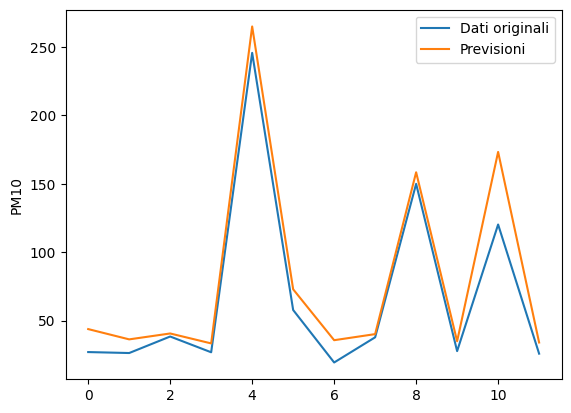

In [258]:
# Utilizza l'indice delle osservazioni come asse x
x_values = range(len(y_test))

# Plot dei dati originali
plt.plot(x_values, y_test, label='Dati originali')

# Plot delle previsioni
plt.plot(x_values, y_prev, label='Previsioni')

plt.legend()

plt.ylabel('PM10')

---
FASE 4
---
---

In [259]:
models = [
    MLPRegressor(),
    XGBRegressor(),
    LinearRegression(),
    RandomForestRegressor(),
    KNeighborsRegressor()
]

MLPRegressor                  : R2_score: 0.2961580306324989, RMSE:  56.182848
XGBRegressor                  : R2_score: 0.9920609952109929, RMSE:   5.966906
LinearRegression              : R2_score:               1.0, RMSE:        0.0
RandomForestRegressor         : R2_score: 0.9988522211689365, RMSE:   2.268795
KNeighborsRegressor           : R2_score: 0.8819334405209424, RMSE:  23.010689


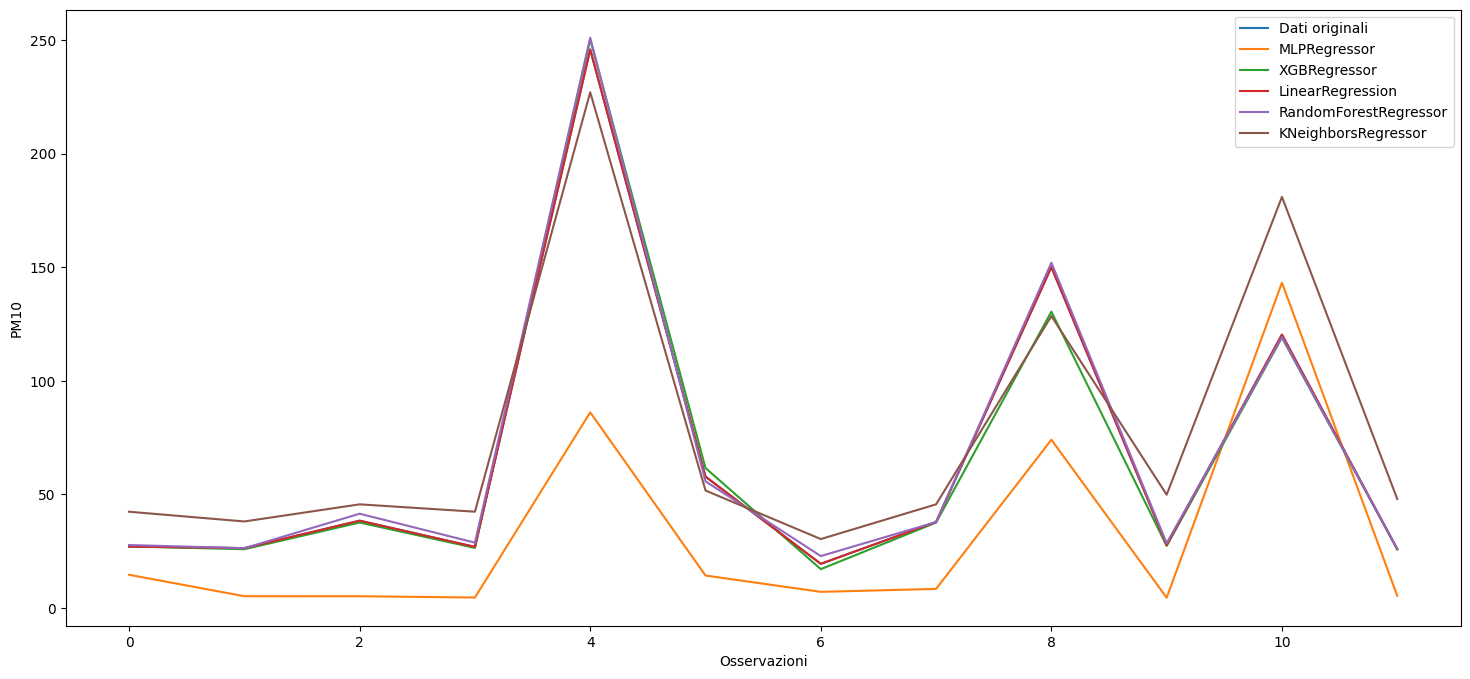

--------------------------------------------------------------------------------------------
LinearRegression              : R2_score: 1.0, RMSE:        0.0


In [260]:
%matplotlib inline
import matplotlib.pyplot as plt

best_model = None
best_score = None
best_loss = None

# Creazione di un unico grafico fuori dal ciclo
plt.figure(figsize=(18, 8))
plt.plot(x_values, y_test, label='Dati originali')  # Plot dei dati originali

for clf in models:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"{clf.__class__.__name__:30}: R2_score: {r2:17}, RMSE: {round(rmse, 6):10}")

    # Plot delle previsioni sullo stesso grafico
    plt.plot(x_values, y_pred, label=f'{clf.__class__.__name__}')

    if best_loss is not None:
        if best_loss > rmse:
            best_model = clf
            best_score = r2
            best_loss = rmse
    else:
        best_model = clf
        best_score = r2
        best_loss = rmse

plt.xlabel('Osservazioni')
plt.ylabel('PM10')
plt.legend()
plt.show()

print("-" * 92)
print(f"{best_model.__class__.__name__:30}: R2_score: {best_score}, RMSE: {round(best_loss, 6):10}")
